# Toronto Neighbourhood through Boroughs Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Data 

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e19b6e3de5ce467c9b98c76b4fddde9e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GPZYgeviAbCmG1H7S8-IJtnqC-YGwjsGovNAXIBNjNLn',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e19b6e3de5ce467c9b98c76b4fddde9e.get_object(Bucket='courseracapstoneassessment-donotdelete-pr-apwbrlq5dtxdtl',Key='Toronto_Neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Analyzing the count ratio, 26% of the data contain 'Not assigned' which is basically NaN for us

In [3]:
NaN_Ratio = ((df[df['Borough'] =='Not assigned'].count())/df.count())*100
NaN_Ratio

Postcode         26.736111
Borough          26.736111
Neighbourhood    26.736111
dtype: float64

### Converting the 'Not assigned' to NaN and Dropping NaN values and sorting values as per 'Neighbourhood' also setting 'Queen's Park' in neighbourhood as per requirement.

In [4]:
df = df[df['Borough']!='Not assigned']
df.dropna(axis = 0, inplace = True)
df.sort_values(by='Neighbourhood', inplace = True)

In [5]:
df[df['Borough'] == "Queen's Park"]

,Postcode,Borough,Neighbourhood
8,M7A,Queen's Park,Not assigned


In [6]:
df['Neighbourhood'] = df['Neighbourhood'].replace('Not assigned',"Queen's Park")

In [7]:
df[df['Borough'] == "Queen's Park"]

,Postcode,Borough,Neighbourhood
8,M7A,Queen's Park,Queen's Park


In [8]:
#Checking if NaN exists now in Data
df.isna().sum()

Postcode         0
Borough          0
Neighbourhood    0
dtype: int64

### Renaming 'Postcode' to 'Postal Code' to make it same on both DataFrames

In [9]:
df.rename({'Postcode' : 'Postal Code'},axis = 1,inplace = True)
df.head()

,Postal Code,Borough,Neighbourhood
68,M5H,Downtown Toronto,Adelaide
180,M1S,Scarborough,Agincourt
205,M1V,Scarborough,Agincourt North
228,M9V,Etobicoke,Albion Gardens
243,M8W,Etobicoke,Alderwood


In [10]:
df.shape

(211, 3)

In [11]:

body = client_e19b6e3de5ce467c9b98c76b4fddde9e.get_object(Bucket='courseracapstoneassessment-donotdelete-pr-apwbrlq5dtxdtl',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

geo= pd.read_csv(body)
geo=pd.DataFrame(geo)
geo.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
geo_df = df.merge(geo)

In [13]:
geo_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568
1,M5H,Downtown Toronto,King,43.650571,-79.384568
2,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
3,M1S,Scarborough,Agincourt,43.794200,-79.262029
4,M1V,Scarborough,Agincourt North,43.815252,-79.284577
5,M1V,Scarborough,L'Amoreaux East,43.815252,-79.284577
6,M1V,Scarborough,Milliken,43.815252,-79.284577
7,M1V,Scarborough,Steeles East,43.815252,-79.284577
8,M9V,Etobicoke,Albion Gardens,43.739416,-79.588437
9,M9V,Etobicoke,Beaumond Heights,43.739416,-79.588437



# Statistical Analysis

In [47]:
from statistics import mode
mode(geo_df['Borough'])

'Etobicoke'

### Grouping the Borough for counts

In [48]:
borough_counts = pd.DataFrame(geo_df.groupby('Borough').size())
borough_counts.rename(columns = {0:'Counts'},inplace = True)
borough_counts.sort_values(by = 'Counts',inplace = True, ascending = False)
borough_counts

,Counts
Borough,
Etobicoke,45
North York,38
Downtown Toronto,37
Scarborough,37
Central Toronto,17
West Toronto,13
York,9
East Toronto,7
East York,6


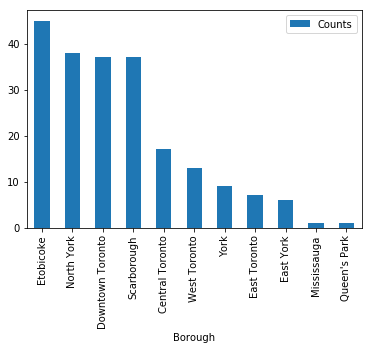

In [49]:
borough_counts.plot(kind = 'bar')

#### 'Etobicoke' has highest number of Neighborhoods as 45 based on mode analysis.

In [75]:
Toronto = geo_df[geo_df['Borough'].str.contains('Toronto',regex=False)]

In [76]:
Toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568
1,M5H,Downtown Toronto,King,43.650571,-79.384568
2,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
21,M5V,Downtown Toronto,Bathurst Quay,43.628947,-79.394420
22,M5V,Downtown Toronto,CN Tower,43.628947,-79.394420
23,M5V,Downtown Toronto,Harbourfront West,43.628947,-79.394420
24,M5V,Downtown Toronto,Island airport,43.628947,-79.394420
25,M5V,Downtown Toronto,King and Spadina,43.628947,-79.394420
26,M5V,Downtown Toronto,Railway Lands,43.628947,-79.394420
27,M5V,Downtown Toronto,South Niagara,43.628947,-79.394420


## Mapping Toronto

In [ ]:
!pip install folium

In [83]:
import folium 
Toronto_map = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(Toronto['Latitude'],Toronto['Longitude'],Toronto['Borough'],Toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(Toronto_map)
Toronto_map

## Clustering Toronto

In [88]:
from sklearn.cluster import KMeans
k=5
clustering = Toronto.drop(['Postal Code','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(clustering)
kmeans.labels_
Toronto.insert(0, 'Cluster Labels', kmeans.labels_)

In [89]:
Toronto

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,3,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568
1,3,M5H,Downtown Toronto,King,43.650571,-79.384568
2,3,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
21,4,M5V,Downtown Toronto,Bathurst Quay,43.628947,-79.394420
22,4,M5V,Downtown Toronto,CN Tower,43.628947,-79.394420
23,4,M5V,Downtown Toronto,Harbourfront West,43.628947,-79.394420
24,4,M5V,Downtown Toronto,Island airport,43.628947,-79.394420
25,4,M5V,Downtown Toronto,King and Spadina,43.628947,-79.394420
26,4,M5V,Downtown Toronto,Railway Lands,43.628947,-79.394420
27,4,M5V,Downtown Toronto,South Niagara,43.628947,-79.394420


## Visualizing Toronto Clusters as per Neighbourhoods

In [93]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
cluster_mapping = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
cc = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(cc)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Toronto['Latitude'], Toronto['Longitude'], 
                                            Toronto['Neighbourhood'], Toronto['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_mapping)
cluster_mapping